# Lab 6

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it.

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16).
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [1]:
import random

class Card:
    def __init__(self, suit, rank):
        self.suit, self.rank = suit, rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_sets=6):
        self.cards = [Card(s, r) for s in ['Hearts', 'Diamonds', 'Clubs', 'Spades'] for r in ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A'] for _ in range(num_sets)]
        self.shuffle()
        self.plastic_index = random.randint(20, 30)

    def shuffle(self):
        random.shuffle(self.cards)

    def draw(self):
        return self.cards.pop(0)

    def replace_plastic_card(self):
        self.cards.insert(self.plastic_index, self.draw())

    def __repr__(self):
        return f"Deck with {len(self.cards)} cards"

In [2]:
deck = Deck(num_sets=2)
print(deck)

hand_size = 3
hand = [deck.draw() for _ in range(hand_size)]
print("Hand:", hand)

print(deck)

Deck with 104 cards
Hand: [8 of Spades, K of Diamonds, 5 of Spades]
Deck with 101 cards


2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook.

In [ ]:
#Named UML diagram for Lab 6

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

In [3]:
class Card:
    def __init__(self, suit, rank):
        self.suit, self.rank = suit, rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"  # String of card

class Deck:
    def __init__(self, num_sets=6):
        self.num_sets = num_sets  # Number of card sets in the deck
        self.cards = []  # List
        self.plastic_index = None

    def shuffle(self):
        pass

    def draw(self):
        pass

    def replace_plastic_card(self):
        pass

    def __repr__(self):
        pass

class Player:
    def __init__(self, name, chips=100):
        self.name, self.chips, self.hand = name, chips, []  # Initialize the player with name, chips, and hand

    def bet(self):
        pass

    def win(self, amount):
        pass

    def lose(self, amount):
        pass

class CountingPlayer(Player):
    def __init__(self, name, threshold):
        super().__init__(name)
        self.threshold, self.count = threshold, 0  # Setting the threshold and counting

    def update_count(self, card):
        pass

    def decide(self):
        pass

class Dealer(Player):
    def decide(self):
        pass  # decide whether to hit or stay

def simulate_round(players, deck):
    pass

def simulate_game():
    pass

4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [4]:
class Player:
    def __init__(self, name):
        self.name = name
        self.hand = []

class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer")

class HumanPlayer(Player): pass

In [5]:
dealer= Dealer()
print(dealer.name)

player1= HumanPlayer("Rama")
player2= HumanPlayer("Perla")

print("Player 1:", player1.name)
print("Player 2:", player2.name)

Dealer
Player 1: Rama
Player 2: Perla


5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [6]:
class Card:
    def __init__(self, suit, rank):
        self.s, self.r = suit, rank

    def __repr__(self):
        return f"{self.r} of {self.s}"

class Deck:
    def __init__(self, n=1):
        self.cards = [Card(s, r) for s in 'Hearts Diamonds Clubs Spades'.split() for r in '2 3 4 5 6 7 8 9 10 Jack Queen King Ace'.split() for _ in range(n)]
        self.shuffle()

    def shuffle(self):
        random.shuffle(self.cards)

    def draw(self):
        return self.cards.pop(0)

class Player:
    def __init__(self, name):
        self.name, self.hand = name, []

class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer")

class Game:
    def __init__(self, n):
        self.deck = Deck()
        self.players = [Dealer() for _ in range(n)] + [Player("Human")]

    def deal(self):
        for _ in range(2):
            for p in self.players:
                p.hand.append(self.deck.draw())

    def play_round(self):
        self.deal()
        for p in self.players:
            print(f"{p.name}'s hand:", p.hand)

In [7]:
game = Game(4)

for r in range(1, 4):
    print(f"Round {r}:")
    game.play_round()
    print()

Round 1:
Dealer's hand: [Queen of Clubs, 5 of Clubs]
Dealer's hand: [10 of Spades, 3 of Spades]
Dealer's hand: [2 of Spades, Jack of Diamonds]
Dealer's hand: [3 of Hearts, 10 of Hearts]
Human's hand: [9 of Diamonds, 8 of Hearts]

Round 2:
Dealer's hand: [Queen of Clubs, 5 of Clubs, 8 of Spades, 5 of Hearts]
Dealer's hand: [10 of Spades, 3 of Spades, 4 of Clubs, King of Hearts]
Dealer's hand: [2 of Spades, Jack of Diamonds, 7 of Spades, 2 of Hearts]
Dealer's hand: [3 of Hearts, 10 of Hearts, 10 of Clubs, 9 of Clubs]
Human's hand: [9 of Diamonds, 8 of Hearts, Ace of Diamonds, 5 of Spades]

Round 3:
Dealer's hand: [Queen of Clubs, 5 of Clubs, 8 of Spades, 5 of Hearts, 2 of Diamonds, 4 of Spades]
Dealer's hand: [10 of Spades, 3 of Spades, 4 of Clubs, King of Hearts, 8 of Diamonds, King of Diamonds]
Dealer's hand: [2 of Spades, Jack of Diamonds, 7 of Spades, 2 of Hearts, 4 of Diamonds, 8 of Clubs]
Dealer's hand: [3 of Hearts, 10 of Hearts, 10 of Clubs, 9 of Clubs, 6 of Clubs, Jack of Clubs]

6. Implement a new player with the following strategy:

    * Assign each card a value:
        * Cards 2 to 6 are +1
        * Cards 7 to 9 are 0
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [8]:
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

    def card_value(self):
        value = -1

        if self.rank == 'Ace':
            value = -1
        elif 2 <= int(self.rank) <= 6:
            value = 1
        elif 7 <= int(self.rank) <= 9:
            value = 0
        return value

class CountingPlayer(Player):
    def __init__(self, name):
        super().__init__(name)
        self.threshold = -2
        self.count = 0

    def update_count(self, card):
        self.count += card.card_value()

    def decide(self):
        return "Hit" if self.count <= self.threshold else "Stay"

player = CountingPlayer("Counting Player")
cards = [Card('Hearts', '2'), Card('Spades', '9'), Card('Clubs', 'Ace')]

for card in cards:
    player.update_count(card)

print("Decision:", player.decide())

Decision: Stay


In [9]:
#My final answer
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

    def card_value(self):
        value = -1

        if self.rank == 'Ace':
            value = -1
        elif 2 <= int(self.rank) <= 6:
            value = 1
        elif 7 <= int(self.rank) <= 9:
            value = 0
        return value

class CountingPlayer(Player):
    def __init__(self, name):
        super().__init__(name)
        self.threshold = -2
        self.count = 0

    def update_count(self, card):
        self.count += card.card_value()

    def decide(self):
        return "Hit" if self.count <= self.threshold else "Stay"

In [10]:
player = CountingPlayer("Counting Player")
cards = [Card('Hearts', '1'), Card('Spades', '9'), Card('Clubs', 'Ace')]

for card in cards:
    player.update_count(card)

print("Decision:", player.decide())

Decision: Hit


7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [11]:
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

    def card_value(self):

        # Assign values to cards for the game
        if self.rank in ('Ace', '2', '3', '4', '5', '6'):
            return 1
        elif self.rank in ('7', '8', '9'):
            return 0
        else:
            return -1

class Player:
    def __init__(self, name, chips=100):

        # Initialize player with a name and chips
        self.name = name
        self.chips = chips
        self.hand = []

    def bet(self):

        # Each player bets 1 chip per round
        return 1

    def win(self, amount):

        # Add chips when player wins
        self.chips += amount

    def lose(self, amount):

        # Subtract chips when player loses
        self.chips -= amount

class CountingPlayer(Player):
    def __init__(self, name):
        super().__init__(name)
        self.threshold = -2
        self.count = 0

    def update_count(self, card):

        # Update card count based on card value
        self.count += card.card_value()

    def decide(self):

        # Decide to hit or stay based on card count
        return "Hit" if self.count <= self.threshold else "Stay"

class Dealer(Player):
    def decide(self):

        # Dealer hits if hand value is less than 17
        hand_value = sum(card.card_value() for card in self.hand)
        return "Hit" if hand_value < 17 else "Stay"

def simulate_round(players, deck):

    # Check if there are enough cards in the deck
    if len(deck) < (len(players) * 2 + 1):
        return

    # Deals cards to players and dealer
    for player in players:
        player.hand = [deck.pop(), deck.pop()]

    dealer = players[0]
    dealer.hand.append(deck.pop())

    # Players either hit or stay
    for player in players[1:]:
        while isinstance(player, CountingPlayer) and player.decide() == "Hit" and len(deck) > 0:
            player.hand.append(deck.pop())

    # Dealer decides to hit or stay
    while isinstance(dealer, Dealer) and dealer.decide() == "Hit" and len(deck) > 0:
        dealer.hand.append(deck.pop())

    # Calculates hand values and who are the winners/losers
    dealer_value = sum(card.card_value() for card in dealer.hand)
    for player in players[1:]:
        if isinstance(player, CountingPlayer):
            player_value = sum(card.card_value() for card in player.hand)
            if player_value > 21 or (dealer_value <= 21 and dealer_value > player_value):
                player.lose(player.bet())
            elif player_value == dealer_value:
                pass
            else:
                player.win(player.bet())

In [12]:
def simulate_game():

    # Initialize players, deck, and shuffles deck
    dealer = Dealer("Dealer")
    strategy_player = CountingPlayer("Strategy Player")
    other_players = [Player(f"Player {i+1}") for i in range(3)]
    players = [dealer, strategy_player] + other_players
    deck = [Card(suit, str(rank)) for suit in ['Hearts', 'Diamonds', 'Clubs', 'Spades'] for rank in range(1, 14)]
    random.shuffle(deck)

    rounds = 0
    # Simulate rounds until reaching 50 or strategy player runs out of chips
    while rounds < 50 and strategy_player.chips > 0:
        rounds += 1
        simulate_round(players, deck)

    # Return strategy player's winnings after 50 rounds
    return strategy_player.chips - 100

winnings = simulate_game()
print("Strategy Player's Winnings:", winnings)

Strategy Player's Winnings: 1


8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt

class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

    def card_value(self):
        if self.rank in ('Ace', '2', '3', '4', '5', '6'):
            return 1
        elif self.rank in ('7', '8', '9'):
            return 0
        else:
            return -1

class Player:
    def __init__(self, name, chips=100):
        self.name = name
        self.chips = chips
        self.hand = []

    def bet(self):
        return 1

    def win(self, amount):
        self.chips += amount

    def lose(self, amount):
        self.chips -= amount

class CountingPlayer(Player):
    def __init__(self, name):
        super().__init__(name)
        self.threshold = -2
        self.count = 0

    def update_count(self, card):
        self.count += card.card_value()

    def decide(self):
        return "Hit" if self.count <= self.threshold else "Stay"

class Dealer(Player):
    def decide(self):
        hand_value = sum(card.card_value() for card in self.hand)
        return "Hit" if hand_value < 17 else "Stay"

def simulate_round(players, deck):
    if len(deck) < (len(players) * 2 + 1):
        return

    for player in players:
        player.hand = [deck.pop(), deck.pop()]

    dealer = players[0]
    dealer.hand.append(deck.pop())

    for player in players[1:]:
        while isinstance(player, CountingPlayer) and player.decide() == "Hit" and len(deck) > 0:
            player.hand.append(deck.pop())

    while isinstance(dealer, Dealer) and dealer.decide() == "Hit" and len(deck) > 0:
        dealer.hand.append(deck.pop())

    dealer_value = sum(card.card_value() for card in dealer.hand)
    for player in players[1:]:
        if isinstance(player, CountingPlayer):
            player_value = sum(card.card_value() for card in player.hand)
            if player_value > 21 or (dealer_value <= 21 and dealer_value > player_value):
                player.lose(player.bet())
            elif player_value == dealer_value:
                pass
            else:
                player.win(player.bet())

def simulate_game():
    dealer = Dealer("Dealer")
    strategy_player = CountingPlayer("Strategy Player")
    other_players = [Player(f"Player {i+1}") for i in range(3)]
    players = [dealer, strategy_player] + other_players
    deck = [Card(suit, str(rank)) for suit in ['Hearts', 'Diamonds', 'Clubs', 'Spades'] for rank in range(1, 14)]
    random.shuffle(deck)

    rounds = 0
    while rounds < 50 and strategy_player.chips > 0:
        rounds += 1
        simulate_round(players, deck)

    return strategy_player.chips - 100

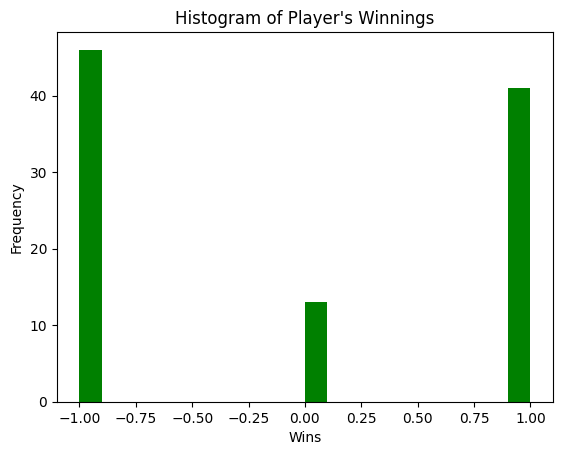

Average Winnings per Round: -0.001
Standard Deviation of Winnings: 0.931396800509858
Probability of Net Winning after playing 50 rounds: 0.41
Probability of Net Losing after playing 50 rounds: 0.46


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# For 100 games

game_results = []
for _ in range(100):
    winnings = simulate_game()
    game_results.append(winnings)

# Histogram of winnings

plt.hist(game_results, bins=20, color='green')
plt.xlabel("Wins")
plt.ylabel("Frequency")
plt.title("Histogram of Player's Winnings")
plt.show()

# Mean of wins per round
average_win = np.mean(game_results) / 50
print("Average Winnings per Round:", average_win)

# STDev of winnings
std_win = np.std(game_results)
print("Standard Deviation of Winnings:", std_win)

# Calculate probability of net winning or losing after 50 rounds
prob_net_win = sum(1 for result in game_results if result > 0) / len(game_results)
prob_net_lost = sum(1 for result in game_results if result < 0) / len(game_results)
print("Probability of Net Winning after playing 50 rounds:", prob_net_win)
print("Probability of Net Losing after playing 50 rounds:", prob_net_lost)

9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

In [15]:
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def card_value(self):
        if self.rank in ('Ace', '2', '3', '4', '5', '6'):
            return 1
        elif self.rank in ('7', '8', '9'):
            return 0
        else:
            return -1

class Player:
    def __init__(self, chips=100):
        self.chips = chips

    def bet(self):
        return 1

    def win(self, amount):
        self.chips += amount

    def lose(self, amount):
        self.chips -= amount

class CountingPlayer(Player):
    def __init__(self, threshold):
        super().__init__()
        self.threshold = threshold
        self.count = 0

    def decide(self):
        return "Hit" if self.count <= self.threshold else "Stay"

class Dealer(Player):
    def decide(self):
        hand_value = sum(card.card_value() for card in self.hand)
        return "Hit" if hand_value < 17 else "Stay"

def simulate_round(players, deck):
    for player in players:
        player.hand = [deck.pop(), deck.pop()]

    dealer = players[0]
    dealer.hand.append(deck.pop())

    for player in players[1:]:
        while isinstance(player, CountingPlayer) and player.decide() == "Hit" and deck:
            player.hand.append(deck.pop())

    while isinstance(dealer, Dealer) and dealer.decide() == "Hit" and deck:
        dealer.hand.append(deck.pop())

    dealer_value = sum(card.card_value() for card in dealer.hand)
    for player in players[1:]:
        if isinstance(player, CountingPlayer):
            player_value = sum(card.card_value() for card in player.hand)
            if player_value > 21 or (dealer_value <= 21 and dealer_value > player_value):
                player.lose(player.bet())
            elif player_value != dealer_value:
                player.win(player.bet())

In [16]:
def simulate_game(threshold):
    dealer = Dealer()
    strategy_player = CountingPlayer(threshold)
    other_players = [Player() for _ in range(3)]
    players = [dealer, strategy_player] + other_players
    deck = [Card(suit, str(rank)) for suit in ['Hearts', 'Diamonds', 'Clubs', 'Spades'] for rank in range(1, 14)]
    random.shuffle(deck)

    for _ in range(50):
        if deck:  # Making sure deck is not empty
            simulate_round(players, deck)
        else:
            break  # Stops when deck is empty

    return strategy_player.chips - 100


threshold_values = [-3, -2, -1, 0, 2]  # 1st Threshold values
average_winnings_per_rounds = []

for threshold in threshold_values:
    game_results = [simulate_game(threshold) for _ in range(100)] # 100 games for each threshold
    avg_win = np.mean(game_results) / 50
    average_winnings_per_rounds.append(avg_win)

optimal_threshold_index = np.argmax(avg_win)
optimal_threshold = threshold_values[optimal_threshold_index]

print("Optimal Threshold Value:", optimal_threshold)

Optimal Threshold Value: -3


In [17]:
threshold_values = [-4, -2, 0, 1, 2]  # 1st Threshold values
avg_win = []

for threshold in threshold_values:
    game_results = [simulate_game(threshold) for _ in range(100)] # 100 games for each threshold
    avg_win = np.mean(game_results) / 50
    average_winnings_per_rounds.append(avg_win)

optimal_threshold_index = np.argmax(avg_win)
optimal_threshold = threshold_values[optimal_threshold_index]

print("Optimal Threshold Value:", optimal_threshold)

Optimal Threshold Value: -4


In [18]:
threshold_values = [-1, 0, 1, 2, 3]  # 1st Threshold values
avg_win = []

for threshold in threshold_values:
    game_results = [simulate_game(threshold) for _ in range(100)] # 100 games for each threshold
    avg_win = np.mean(game_results) / 50
    average_winnings_per_rounds.append(avg_win)

optimal_threshold_index = np.argmax(avg_win)
optimal_threshold = threshold_values[optimal_threshold_index]

print("Optimal Threshold Value:", optimal_threshold)

Optimal Threshold Value: -1


In [19]:
threshold_values = [0, 1, 2, 3, 4, 5]  # 1st Threshold values
avg_win = []

for threshold in threshold_values:
    game_results = [simulate_game(threshold) for _ in range(100)] # 100 games for each threshold
    avg_win = np.mean(game_results) / 50
    average_winnings_per_rounds.append(avg_win)

optimal_threshold_index = np.argmax(avg_win)
optimal_threshold = threshold_values[optimal_threshold_index]

print("Optimal Threshold Value:", optimal_threshold)

Optimal Threshold Value: 0


In [20]:
threshold_values = [-5, -4, -3, -2, -1]  # 1st Threshold values
avg_win = []

for threshold in threshold_values:
    game_results = [simulate_game(threshold) for _ in range(100)] # 100 games for each threshold
    avg_win = np.mean(game_results) / 50
    average_winnings_per_rounds.append(avg_win)

optimal_threshold_index = np.argmax(avg_win)
optimal_threshold = threshold_values[optimal_threshold_index]

print("Optimal Threshold Value:", optimal_threshold)

Optimal Threshold Value: -5


10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings.

In [21]:
class Card:
    def __init__(self, suit, rank):
        self.suit, self.rank = suit, rank
    def card_value(self):

      ## Using the card rank to assign the values
        return 1 if self.rank in '234567' else 0 if self.rank in '789' else -1

class Player:
    def __init__(self, chips=100):
        self.chips = chips
    def bet(self):
        return 1
    def win(self, amount):

      ## Number of chips deciding whether player wins or not
        self.chips += amount
    def lose(self, amount):
        self.chips -= amount

class CountingPlayer(Player):
    def __init__(self, threshold):
        super().__init__()
        self.threshold = threshold
    def decide(self, hand_value):

      ## Using hand value to hit or stand
        return "Stay" if hand_value >= 18 else "Hit"

class Dealer(Player):
    def decide(self):
        return "Stay" if sum(c.card_value() for c in self.hand) >= 17 else "Hit"

def simulate_round(players, deck):
    for player in players:
        player.hand = [deck.pop() for _ in range(2)]
    dealer = players[0]
    dealer.hand.append(deck.pop())
    for player in players[1:]:
        while isinstance(player, CountingPlayer) and player.decide(sum(c.card_value() for c in player.hand)) == "Hit" and deck:
            player.hand.append(deck.pop())

            ## You can hit until the deck is empty or til you stand
    while isinstance(dealer, Dealer) and dealer.decide() == "Hit" and deck:
        dealer.hand.append(deck.pop())
    dealer_value = sum(c.card_value() for c in dealer.hand)
    for player in players[1:]:
        if isinstance(player, CountingPlayer):
            player_value = sum(c.card_value() for c in player.hand)
            if player_value > 21 or (dealer_value <= 21 and dealer_value > player_value): ## Lose if dealer's hand is higher or if you're busted
                player.lose(player.bet())
            elif player_value != dealer_value:
                player.win(player.bet())

def simulate_game(threshold):
    dealer = Dealer()
    strategy_player = CountingPlayer(threshold)
    other_players = [Player() for _ in range(3)]
    players = [dealer, strategy_player] + other_players
    deck = [Card(s, str(r)) for s in 'Hearts Diamonds Clubs Spades'.split() for r in range(1, 14)]
    random.shuffle(deck)
    for _ in range(50):
        if deck:
            simulate_round(players, deck)
        else:
            break
    return strategy_player.chips - 100

In [22]:
threshold_values = [-5, -4, -3, -2, -1]
avg_win_new= [np.mean([simulate_game(th) for _ in range(100)]) / 50 for th in threshold_values]
optimal_threshold = threshold_values[np.argmax(avg_win_new)]

print("Improved Method - Optimal Threshold Value:", optimal_threshold)

Improved Method - Optimal Threshold Value: -1


In [ ]:
# Using the same numbers from question 9, the new method shows improved results.
# The value for the method in Q9 is -5, while in Q10